In [1]:
import pandas as pd
import os
from pprint import pprint
import requests
import json
from config import api_key
import sys
import matplotlib.pyplot as plt
import numpy as np

In [23]:
#Get hospital data and Census data combined
clean_hospital= pd.read_csv("Outputs/Finalized_Data.csv")

clean_hospital

,Hospital name,Hospital City,Hospital County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,Hospital Longitude,Street Address,State,Hospital Zip Code,Full Address,City Zip Code,City Latitude,City Longitude,City County,Population,Median Income
0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,-84.926304,1035 Red Bud Road Northeast,Georgia,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30703.0,34.479066,-84.762161,Gordon County,40820,24110
1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,-84.783038,707 Old Dalton Ellijay Road,Georgia,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,Los Angeles County,33460,24457
2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,-83.972128,915 Gordon Avenue,Georgia,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31758.0,30.868187,-83.927785,Thomas County,34781,24350
3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,-83.559146,903 North Court Street,Georgia,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,Wood County,9062,24644
4,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,-84.205317,90 East Stephens Street,Georgia,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,Mitchell County,8419,21584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,NaN,Zebulon,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30295.0,33.101705,-84.312520,Wake County,4352,31654
538,Emory Johns Creek Hospital,Alpharetta,Fulton County,118,2007,Emory,NaN,ChIJ8wevZy-Z9YgR5mpDmsMDM48,34.066497,-84.176237,6325 Hospital Parkway,Georgia,30097.0,"6325 Hospital Pkwy, Johns Creek, GA 30097, USA",30005.0,34.080035,-84.219290,Fulton County,189192,51690
539,Southeast Georgia Health System Camden,Saint Marys,Camden County,40,NaN,SGHS,NaN,ChIJU6IsZ5cE5YgRaTwbgslwgUw,30.780917,-81.615147,2000 Dan Proctor Drive,Georgia,31558.0,"2000 Dan Proctor Dr, St Marys, GA 31558, USA",31558.0,30.761081,-81.569120,Jasper County,21307,29862
540,WellStar West Georgia Medical Center,Lagrange,Troup County,542,1937,WellStar,NaN,ChIJ40ZJ5vtWi4gRK6PnDb-BAPU,33.030940,-85.058637,1514 Vernon Road,Georgia,30240.0,"1514 Vernon Rd, LaGrange, GA 30240, USA",30241.0,33.036715,-84.988950,Troup County,54380,23961


In [3]:
# Prepare data for charts

hospital_data = clean_hospital[['Hospital name', 'Hospital City', 'Hospital County','Acute Care Beds', 'Median Income','Population']]
hospital_data

hospital_sum_city = hospital_data.groupby('Hospital City')['Acute Care Beds'].sum()
hospital_sum_city = hospital_sum_city.reset_index()
hospital_sum_city



,Hospital City,Acute Care Beds
0,Abbeville,0
1,Acworth,0
2,Adairsville,0
3,Adel,60
4,Adrian,0
...,...,...
509,Wrens,0
510,Wrightsville,0
511,Yatesville,0
512,Young Harris,0


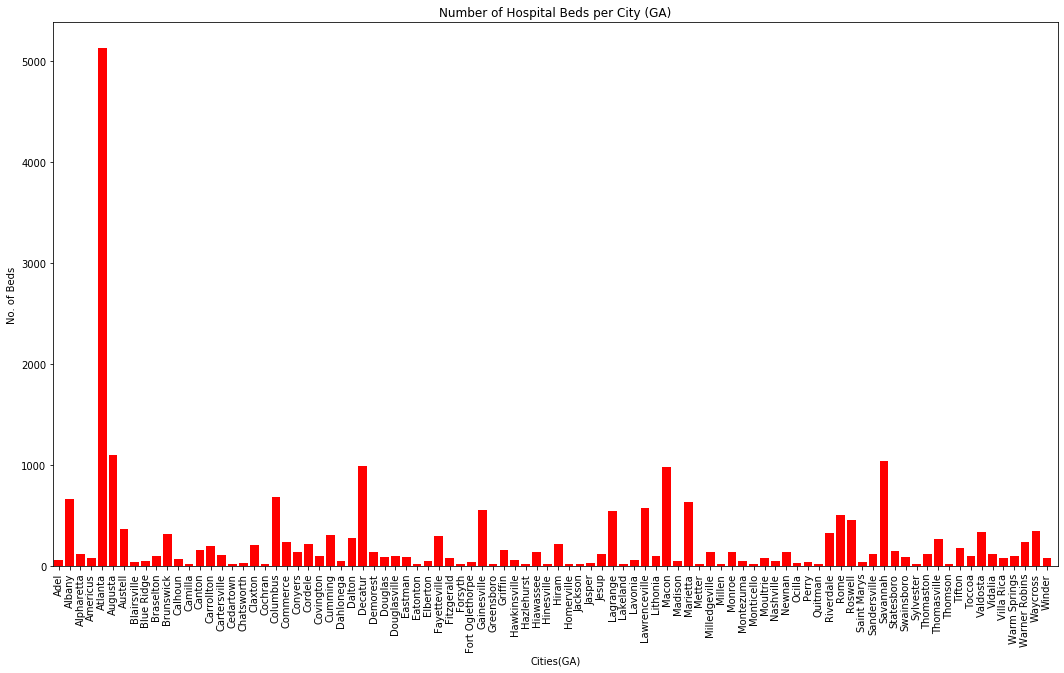

In [24]:
# Plot Hospital Beds per City

hospital_bed_city = hospital_sum_city.loc[(hospital_sum_city['Acute Care Beds'] > 0)]
hospital_bed_city
plt.figure(figsize=(18,10))
plt.bar(hospital_bed_city['Hospital City'],hospital_bed_city['Acute Care Beds'], color="red")
plt.xticks(hospital_bed_city['Hospital City'], rotation='vertical')
plt.title('Number of Hospital Beds per City (GA)')
plt.xlabel('Cities(GA)')
plt.ylabel('No. of Beds')
plt.xlim(-0.5,len(hospital_bed_city['Hospital City']))

plt.savefig("Charts/Hospital_Beds_per_City.png")

plt.show()



In [5]:
# Prepare Data for Plot Chart

hospital_count_city = hospital_data.groupby('Hospital City')['Hospital name'].count()
hospital_count_city = hospital_count_city.reset_index()
hospital_count_city



,Hospital City,Hospital name
0,Abbeville,0
1,Acworth,0
2,Adairsville,0
3,Adel,1
4,Adrian,0
...,...,...
509,Wrens,0
510,Wrightsville,0
511,Yatesville,0
512,Young Harris,0


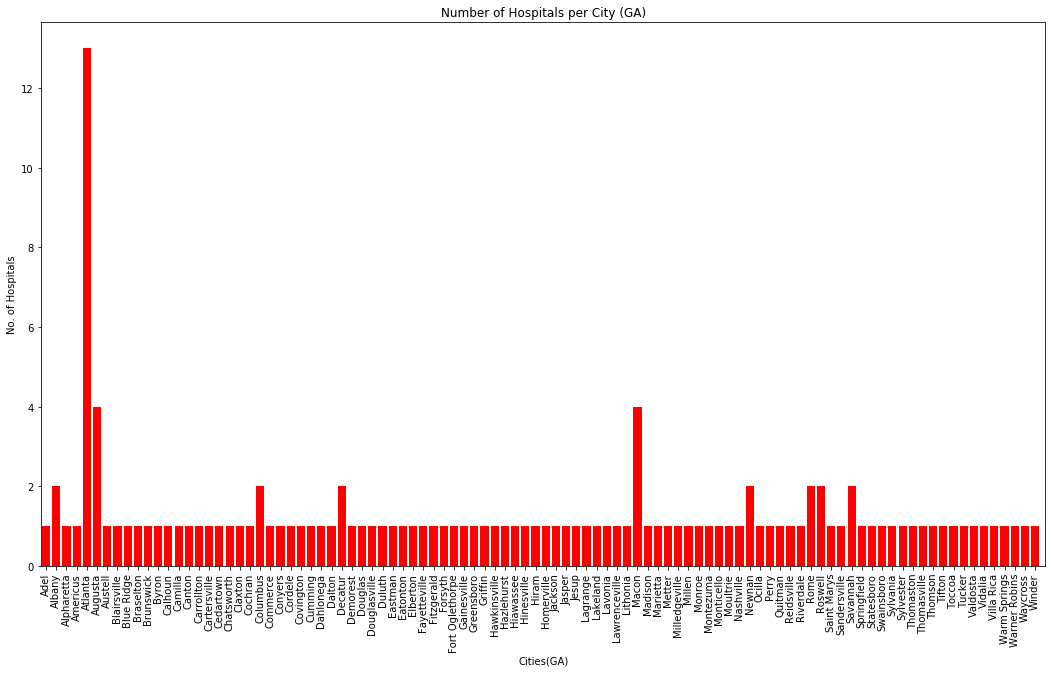

In [25]:
# Plot Number of Hospitals per City

hospital_count_city = hospital_count_city.loc[(hospital_count_city['Hospital name'] > 0)]
hospital_count_city


plt.figure(figsize=(18,10))
plt.bar(hospital_count_city['Hospital City'],hospital_count_city['Hospital name'], color="red")
plt.xticks(hospital_count_city['Hospital City'], rotation='vertical')
plt.title('Number of Hospitals per City (GA)')
plt.xlabel('Cities(GA)')
plt.ylabel('No. of Hospitals')
plt.xlim(-0.5,len(hospital_count_city['Hospital City']))


plt.savefig("Charts/Hospitals_per_City.png")
plt.show()


In [26]:
# Prepare data for charts

hospital_sum_county = hospital_data.groupby('Hospital County')['Acute Care Beds'].sum()
hospital_sum_county = hospital_sum_county.reset_index()
hospital_sum_county['Hospital County'].replace(regex=True,inplace=True,to_replace=r'County',value=r'')


,Hospital County,Acute Care Beds
0,Baldwin,140
1,Barrow,80
2,Bartow,112
3,Ben Hill,75
4,Berrien,51
...,...,...
84,Ware,345
85,Washington,116
86,Wayne,115
87,Whitfield,282


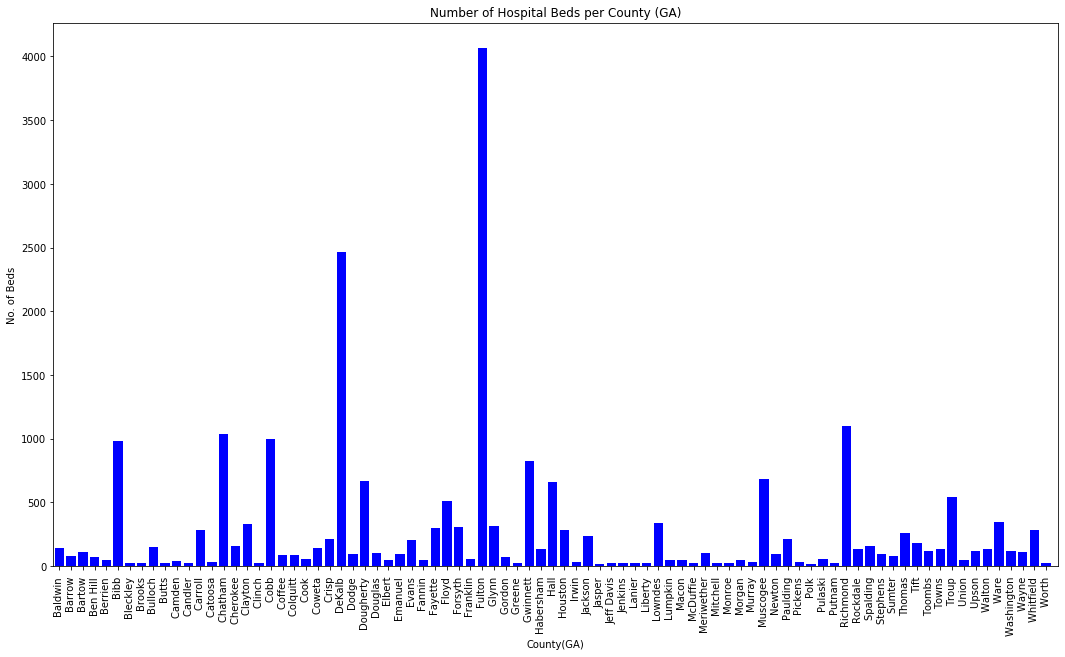

In [27]:
# Plot Hospital Bed per County

hospital_bed_county = hospital_sum_county.loc[(hospital_sum_county['Acute Care Beds'] > 0)]
hospital_bed_county
plt.figure(figsize=(18,10))
plt.bar(hospital_bed_county['Hospital County'],hospital_bed_county['Acute Care Beds'], color="blue")
plt.xticks(hospital_bed_county['Hospital County'], rotation='vertical')
plt.title('Number of Hospital Beds per County (GA)')
plt.xlabel('County(GA)')
plt.ylabel('No. of Beds')
plt.xlim(-0.5,len(hospital_bed_county['Hospital County']))

plt.savefig("Charts/Hospital_Beds_per_County.png")

plt.show()


In [28]:
# Prepare data for chart

hospital_count_county = hospital_data.groupby('Hospital County')['Hospital name'].count()
hospital_count_county = hospital_count_county.reset_index()
hospital_count_county['Hospital County'].replace(regex=True,inplace=True,to_replace=r'County',value=r'')
hospital_count_county


,Hospital County,Hospital name
0,Baldwin,1
1,Barrow,1
2,Bartow,1
3,Ben Hill,1
4,Berrien,1
...,...,...
84,Ware,1
85,Washington,1
86,Wayne,1
87,Whitfield,1


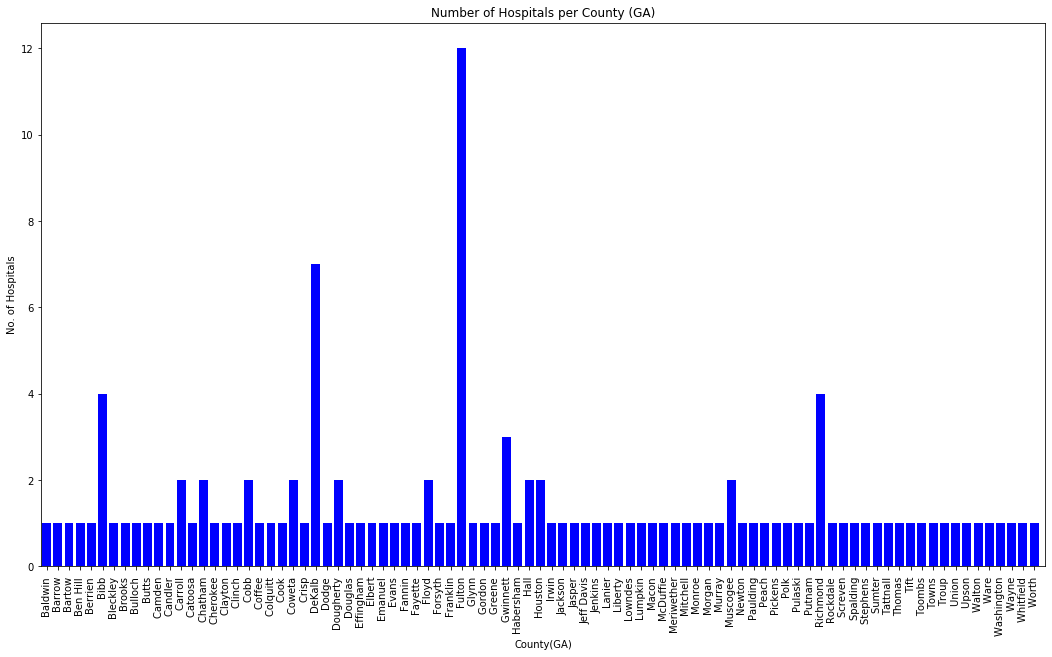

In [29]:
# Plot Number of Hospitals per County

hospital_count_county = hospital_count_county.loc[(hospital_count_county['Hospital name'] > 0)]
hospital_count_county


plt.figure(figsize=(18,10))
plt.bar(hospital_count_county['Hospital County'],hospital_count_county['Hospital name'], color="blue")
plt.xticks(hospital_count_county['Hospital County'], rotation='vertical')
plt.title('Number of Hospitals per County (GA)')
plt.xlabel('County(GA)')
plt.ylabel('No. of Hospitals')
plt.xlim(-0.5,len(hospital_count_county['Hospital County']))


plt.savefig("Charts/Hospitals_per_County.png")
plt.show()

In [30]:
# beds by population by city

hospital_sum_city = hospital_data.groupby('Hospital City').sum()
hospital_sum_city = hospital_sum_city.reset_index()
hospital_sum_city

hospital_sum_city = hospital_sum_city.loc[(hospital_sum_city['Acute Care Beds'] > 0)]
hospital_sum_city


hospital_sum_city["Beds per 1000"] = 1000*hospital_sum_city["Acute Care Beds"]/hospital_sum_city["Population"]
hospital_sum_city['Beds per 1000'].replace(np.inf, 0, inplace=True)
hospital_sum_city

,Hospital City,Acute Care Beds,Median Income,Population,Beds per 1000
3,Adel,60,25632,10836,5.537099
8,Albany,668,47242,195454,3.417684
12,Alpharetta,118,103380,378384,0.311853
16,Americus,76,21422,24804,3.064022
24,Atlanta,5124,481078,12848550,0.398800
...,...,...,...,...,...
477,Villa Rica,80,31256,37325,2.143336
481,Warm Springs,104,16714,2571,40.451186
482,Warner Robins,237,28110,86531,2.738903
489,Waycross,345,23868,35587,9.694551


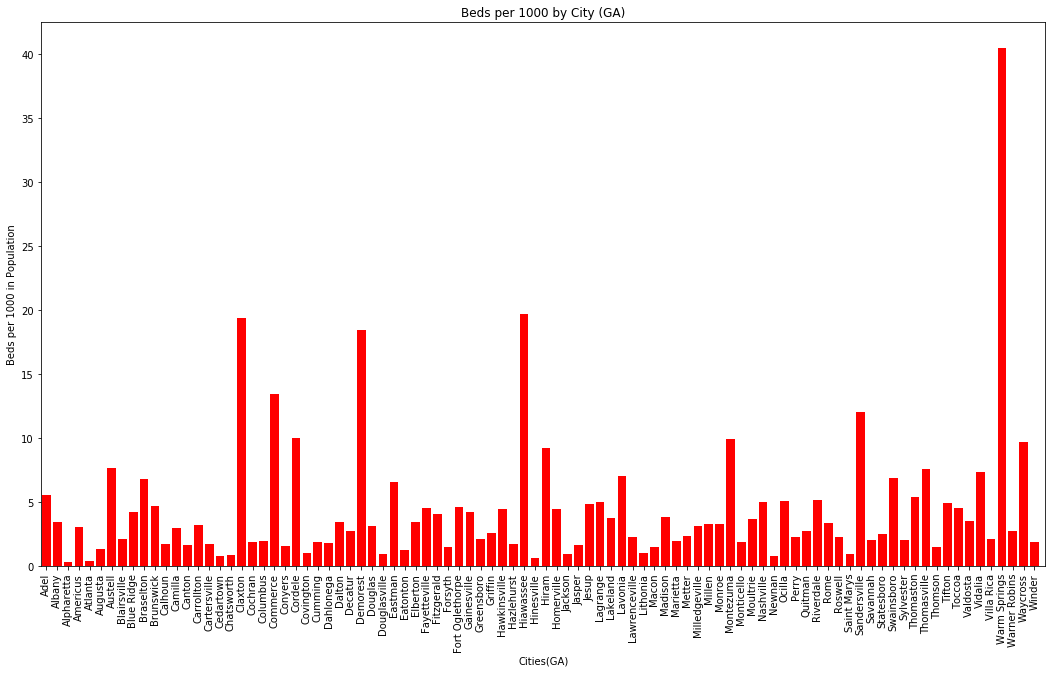

In [31]:
# Plot Beds per 1000 by City

plt.figure(figsize=(18,10))
plt.bar(hospital_sum_city['Hospital City'],hospital_sum_city["Beds per 1000"], color="red")
plt.xticks(hospital_sum_city['Hospital City'], rotation='vertical')
plt.title('Beds per 1000 by City (GA)')
plt.xlabel('Cities(GA)')
plt.ylabel('Beds per 1000 in Population')
plt.xlim(-0.5,len(hospital_sum_city['Hospital City']))

plt.savefig("Charts/Bed_per_1000_by_City.png")

plt.show()

In [32]:
# prep data for beds by 1000 by county

hospital_sum_county = hospital_data.groupby('Hospital County').sum()
hospital_sum_county = hospital_sum_county.reset_index()
hospital_sum_county

hospital_sum_county = hospital_sum_county.loc[(hospital_sum_county['Acute Care Beds'] > 0)]
hospital_sum_county
hospital_sum_county['Hospital County'].replace(regex=True,inplace=True,to_replace=r'County',value=r'')

hospital_sum_county["Beds per 1000"] = 1000*hospital_sum_county["Acute Care Beds"]/hospital_sum_county["Population"]
hospital_sum_county['Beds per 1000'].replace(np.inf, 0, inplace=True)

hospital_sum_county

,Hospital County,Acute Care Beds,Median Income,Population,Beds per 1000
0,Baldwin,140,18000,44261,3.163056
1,Barrow,80,26214,42975,1.861547
2,Bartow,112,28639,64626,1.733049
3,Ben Hill,75,20822,18322,4.093440
4,Berrien,51,21910,10237,4.981928
...,...,...,...,...,...
84,Ware,345,23868,35587,9.694551
85,Washington,116,22395,9636,12.038190
86,Wayne,115,21266,23755,4.841086
87,Whitfield,282,25269,81843,3.445621


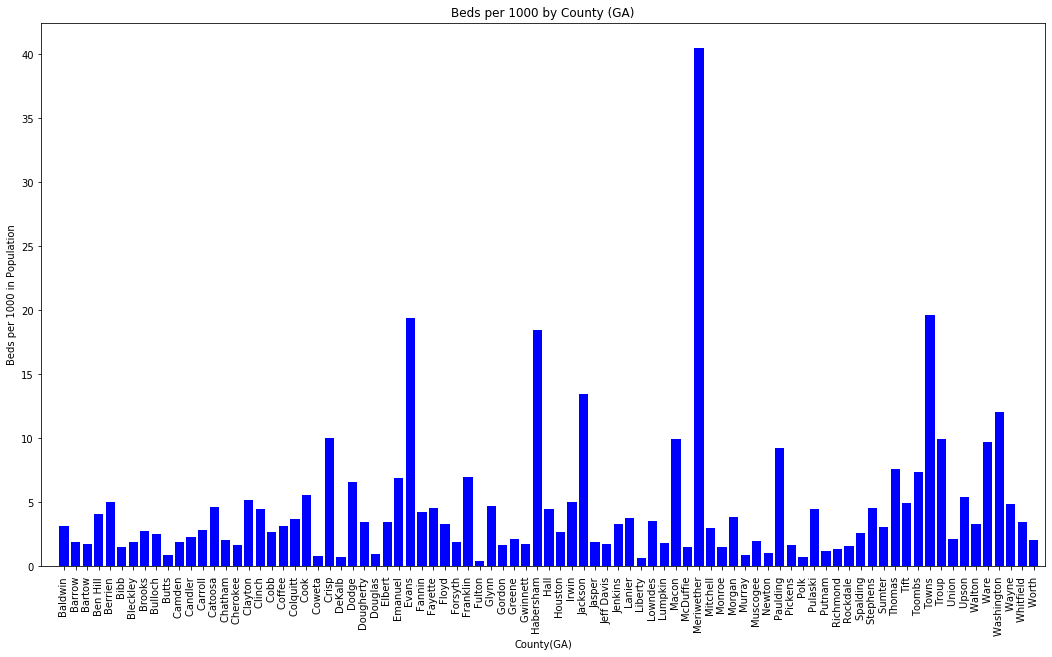

In [33]:
# Plot Beds per 1000 by County

plt.figure(figsize=(18,10))
plt.bar(hospital_sum_county['Hospital County'],hospital_sum_county["Beds per 1000"], color="blue")
plt.xticks(hospital_sum_county['Hospital County'], rotation='vertical')
plt.title('Beds per 1000 by County (GA)')
plt.xlabel('County(GA)')
plt.ylabel('Beds per 1000 in Population')
plt.xlim(-2,len(hospital_sum_county['Hospital County']))

plt.savefig("Charts/Bed_per_1000_by_County.png")

plt.show()

In [34]:
# Income by City data prep

income_city = hospital_data.groupby('Hospital City').median()
income_city = income_city.loc[(income_city['Acute Care Beds'] > 0)]


income_city = income_city.reset_index()
income_city

,Hospital City,Acute Care Beds,Median Income,Population
0,Adel,60.0,25632.0,10836.0
1,Albany,334.0,23621.0,97727.0
2,Alpharetta,59.0,51690.0,189192.0
3,Americus,76.0,21422.0,24804.0
4,Atlanta,460.0,37006.0,988350.0
...,...,...,...,...
87,Villa Rica,80.0,31256.0,37325.0
88,Warm Springs,104.0,16714.0,2571.0
89,Warner Robins,237.0,28110.0,86531.0
90,Waycross,345.0,23868.0,35587.0


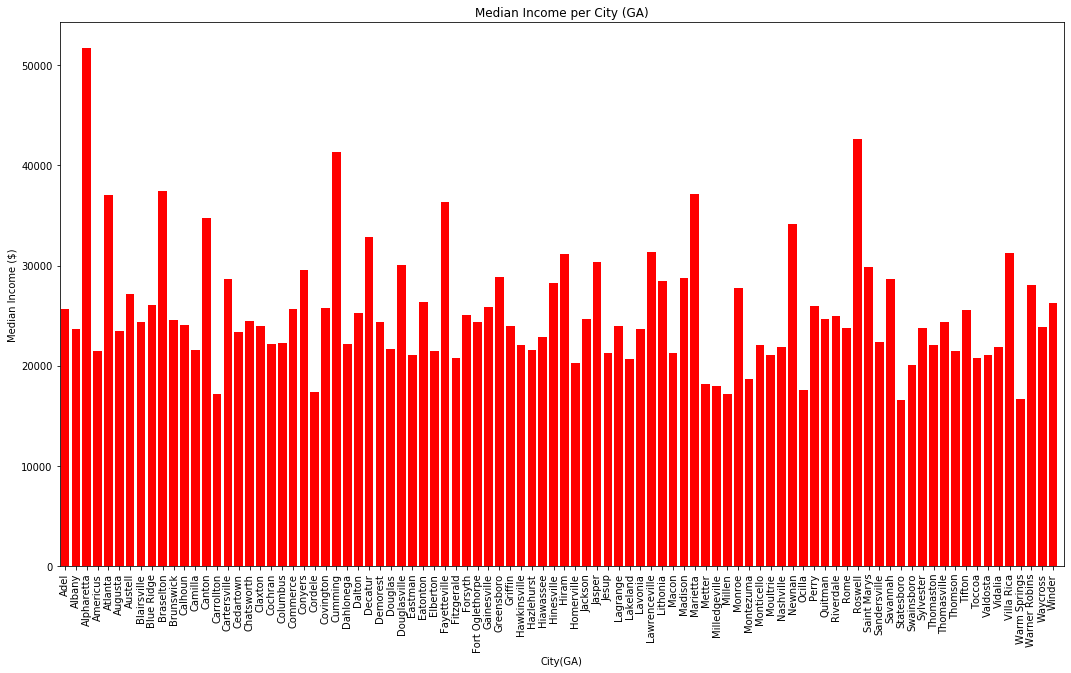

In [35]:
# Plot Median Income by City

plt.figure(figsize=(18,10))
plt.bar(income_city['Hospital City'],income_city['Median Income'], color="red")
plt.xticks(income_city['Hospital City'], rotation='vertical')
plt.title('Median Income per City (GA)')
plt.xlabel('City(GA)')
plt.ylabel('Median Income ($)')
plt.xlim(-0.5,len(income_city['Hospital City']))


plt.savefig("Charts/Median_Income_per_City.png")
plt.show()

In [36]:
# Prep data for income by County


income_county = hospital_data.groupby('Hospital County').median()
income_county = income_county.loc[(income_county['Acute Care Beds'] > 0)]
income_county = income_county.reset_index()
income_county['Hospital County'].replace(regex=True,inplace=True,to_replace=r'County',value=r'')
income_county



,Hospital County,Acute Care Beds,Median Income,Population
0,Baldwin,140.0,18000.0,44261.0
1,Barrow,80.0,26214.0,42975.0
2,Bartow,112.0,28639.0,64626.0
3,Ben Hill,75.0,20822.0,18322.0
4,Berrien,51.0,21910.0,10237.0
...,...,...,...,...
80,Ware,345.0,23868.0,35587.0
81,Washington,116.0,22395.0,9636.0
82,Wayne,115.0,21266.0,23755.0
83,Whitfield,282.0,25269.0,81843.0


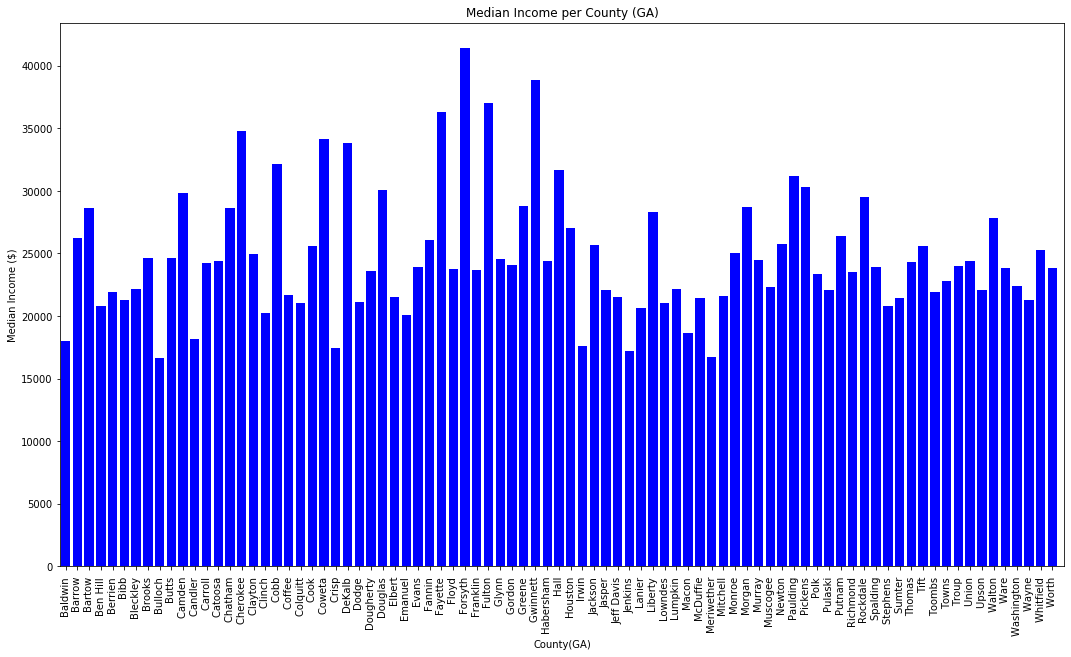

In [37]:
# Plot income by County chart

plt.figure(figsize=(18,10))
plt.bar(income_county['Hospital County'],income_county['Median Income'], color="blue")
plt.xticks(income_county['Hospital County'], rotation='vertical')
plt.title('Median Income per County (GA)')
plt.xlabel('County(GA)')
plt.ylabel('Median Income ($)')
plt.xlim(-0.5,len(income_county['Hospital County']))


plt.savefig("Charts/Median_Income_per_County.png")
plt.show()

